# Crews RNA seq Analysis 

* Modeled on "RNA-seq analysis is easy as 1-2-3 with limma, Glimma and edgeR" ([1](#Citations))


## Parameter Input

In [1]:
gPreviousStepRdataEnv = "../interim/crews_rnaseq_20220304_data.RData"

In [2]:
gSourceDir = "./src/"
# Import shared source code to load and save previous notebooks' environments:
source(paste0(gSourceDir, "ChainedNotebookSupport.R"))
# Import the previous step's state:
gPreviousStepEnv = loadToEnvironment(gPreviousStepRdataEnv)

In [3]:
# Load relevant variables:
gIsoDgeList = gPreviousStepEnv$gIsoDgeList
gIsoIdCol = gPreviousStepEnv$gIsoIdCol

[Table of Contents](#Table-of-Contents)

## Library Import

Import the necessary R, Bioconductor, and CCBB libraries for the analysis:

In [4]:
library(limma)
library(edgeR)
library(Glimma)

In [5]:
library(IRdisplay)

Warning message:
“package ‘IRdisplay’ was built under R version 4.1.0”


In [6]:
source(paste0(gSourceDir, "PcaPlotter.R"))
source(paste0(gSourceDir, "CountsPcaPlotter.R"))

In [7]:
# This line prevents SVG output, which interacts badly with export to HTML
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

In [8]:
lcpm_iso <- cpm(gIsoDgeList, log=TRUE)[,1:6]

## MCL1 Expression

In [9]:
MCL1.tx <- c("ENST00000307940", "ENST00000369026")
table(rownames(gIsoDgeList$counts) %in% MCL1.tx)
MCL1.tx.exp.filt <- lcpm_iso[rownames(lcpm_iso) %in% MCL1.tx,]
dim(MCL1.tx.exp.filt)
MCL1.tx.exp.filt
MCL1.tx.exp.df <- cbind.data.frame(gIsoDgeList$samples, as.data.frame(t(MCL1.tx.exp.filt)))
MCL1.tx.exp.df$Label <- gsub("^X[1-6]\\.|_S[1-6]*", "", MCL1.tx.exp.df$Sample)
colnames(MCL1.tx.exp.df)[8:9] <- c("MCL1-S", "MCL1-L")
MCL1.tx.exp.df$ratio <- as.numeric(MCL1.tx.exp.df$"MCL1-L") - as.numeric(MCL1.tx.exp.df$"MCL1-S")
MCL1.tx.exp.df$Label <- factor(as.character(MCL1.tx.exp.df$Label), 
                                 levels=c("FD.BMV", "FD.BM5", "FD.BM10", "FD.SPV",  "FD.SP5",  "FD.SP10"))
MCL1.tx.exp.df



 FALSE   TRUE 
150988      2 

[1] 2 6

,X1.FD.BMV_S1,X2.FD.BM5_S2,X3.FD.BM10_S3,X4.FD.SPV_S4,X5.FD.SP5_S5,X6.FD.SP10_S6
ENST00000307940,-3.613775,1.515990,3.970125,0.1775431,0.531618,3.265199
ENST00000369026,7.799891,7.506437,8.055521,8.0396494,7.470850,6.793264


,group,lib.size,norm.factors,Sample,Tissue,Tx,Sort,MCL1-S,MCL1-L,Label,ratio
,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<dbl>
X1.FD.BMV_S1,BM,8327259,1,X1.FD.BMV_S1,BM,V,US,-3.6137754,7.799891,FD.BMV,11.413666
X2.FD.BM5_S2,BM,35061455,1,X2.FD.BM5_S2,BM,5,US,1.5159898,7.506437,FD.BM5,5.990447
X3.FD.BM10_S3,BM,13904070,1,X3.FD.BM10_S3,BM,10,US,3.9701250,8.055521,FD.BM10,4.085396
X4.FD.SPV_S4,SP,42448525,1,X4.FD.SPV_S4,SP,V,US,0.1775431,8.039649,FD.SPV,7.862106
X5.FD.SP5_S5,SP,35142795,1,X5.FD.SP5_S5,SP,5,US,0.5316180,7.470850,FD.SP5,6.939232
X6.FD.SP10_S6,SP,12020687,1,X6.FD.SP10_S6,SP,10,US,3.2651994,6.793264,FD.SP10,3.528065
SORTED_1.FD.BMV_S1,BM,8327259,1,SORTED_1.FD.BMV_S1,BM,V,S,-3.6137754,7.799891,NA,11.413666
SORTED_2.FD.BM5_S2,BM,35061455,1,SORTED_2.FD.BM5_S2,BM,5,S,1.5159898,7.506437,NA,5.990447
SORTED_3.FD.BM10_S3,BM,13904070,1,SORTED_3.FD.BM10_S3,BM,10,S,3.9701250,8.055521,NA,4.085396


## Figure 5F - MCL1-L & MCL1-S Expression


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




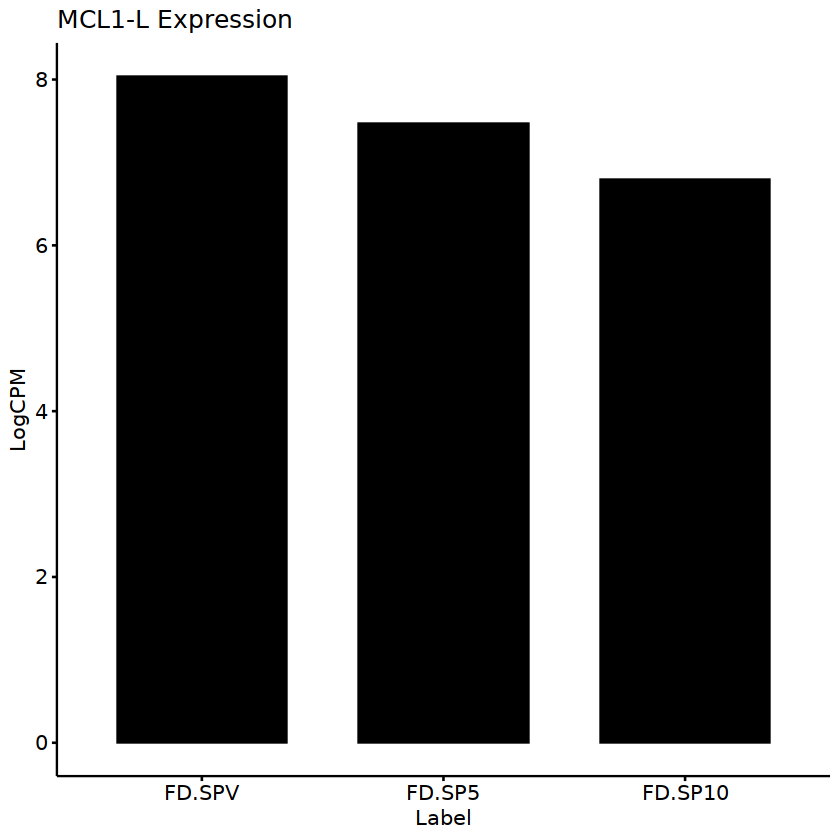

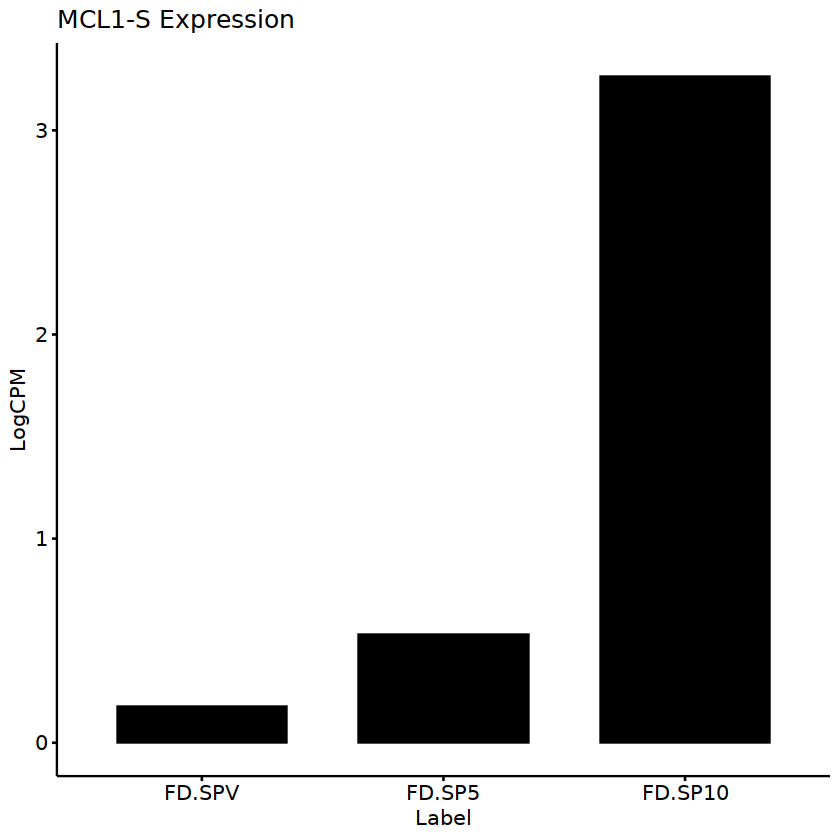

In [10]:
library(ggpubr)
ggbarplot(MCL1.tx.exp.df[4:6,], x="Label", y="MCL1-L", ylab="LogCPM", main="MCL1-L Expression", fill="black")
ggbarplot(MCL1.tx.exp.df[4:6,], x="Label", y="MCL1-S", ylab="LogCPM", main="MCL1-S Expression", fill="black")


## Appendix: R Session Info

In [13]:
Sys.time()
sessionInfo()

[1] "2023-01-19 21:50:16 UTC"

R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.2 LTS

Matrix products: default
BLAS/LAPACK: /home/ubuntu/anaconda3/lib/libmkl_rt.so.1

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] ggpubr_0.4.0  ggplot2_3.3.5 cowplot_1.1.1 IRdisplay_1.0 Glimma_2.0.0 
[6] edgeR_3.32.1  limma_3.46.0 

loaded via a namespace (and not attached):
  [1] bitops_1.0-7                matrixStats_0.61.0         
  [3] bit64_4.0.5                 RColorBrewer_1.1-2         
  [5] progress_1.2.2              httr_1.4.2                 
  [7] GenomeInfoDb_1.26.7         

[Table of Contents](#Table-of-Contents)

Copyright (c) 2018 UC San Diego Center for Computational Biology & Bioinformatics under the MIT License

Notebook template by Amanda Birmingham